![](rplogo_small.png)
<h1>
    <center>TIPP - AAI Assignement (Python for Data Science)</center>
    <center>Due Due: 31st January 2020</center>
</h1>
<h3>
    <center>Submitted By: Koay Seng Tian</center>
    <center>Email: sengtian@yahoo.com</center>
</h3>

In [1]:
# show the versions of modules/packages imported
from platform import python_version

import matplotlib
import numpy
import pandas
import PIL
import skimage
import sys

print('Version(s):\n')
print('python =', python_version())

print('mathplotlib =', matplotlib.__version__)
print('numpy =', numpy.__version__)
print('pandas =', pandas.__version__)
print('Pillow =', PIL.__version__)
print('skimage =', skimage.__version__)
print('sys = ', sys.version)


Version(s):

python = 3.7.5
mathplotlib = 2.2.3
numpy = 1.17.4
pandas = 0.25.3
Pillow = 7.0.0
skimage = 0.15.0
sys =  3.7.5 (default, Oct 31 2019, 15:18:51) [MSC v.1916 64 bit (AMD64)]


# Question 1 (5 Marks)
A vineyard owner is planting several new rows of grapevines, and needs to know how many grapevines to plant in each row. She has determined that after measuring the length of a future row, she can use the following formula to calculate the number of vines that will fit in the row, along with the trellis end-post assemblies that will need to be constructed at each end of the row:

\begin{equation}V = \frac{R - 2E}{S} \end{equation}

The terms in the formula are:
- V is the number of grapevines that will fit in the row.
- R is the length of the row, in feet.
- E is the amount of space, in feet, used by an end-post assembly. 
- S is the space between vines, in feet.

Write a script that makes the calculation for the vineyard owner. The program should ask the user to input the following:
- The length of the row, in feet.
- The amount of space used by an end-post assembly, in feet.
- The amount of space between the vines, in feet.

Once the input data has been entered, the program should calculate and display the number of grapevines that will fit in the row.

In [2]:
# calculate the number of vinces that will fit in the row along with the trellis 
# end-post assemblies that will need to be constrcuted at each end of the row.

def calculateGrapevinesNumber(r, e, s):
    return (r - (2 * e))/(s)

def getInput(message, zeroAllowed=False):
    loop = True
    while loop:
        
        # test the input is not zero
        try:
            i = float(input(message))
        except ValueError:
            print('You have entered an invalid number.  Please try again!\n')
            continue
            
        # test input is not zero (when zeroAllowed=False) 
        # in order not to cause division by zero error
        if not zeroAllowed:
            try:
                test = 1/i
            except ZeroDivisionError:
                print('You have entered a zero.  Please try again!\n')
                continue
                        
        # all tests passed, no lopping is needed
        loop = False
        
    return i

print('Note: Enter the measurements in feet\n')
rowLength = getInput('Enter the length of row\t\t\t\t\t: ')

# test numerator (R - 2E) is not less or equal zero
while True:
    endpostAssembly = getInput('Enter the amount of space used by an end-post assembly\t: ')
    if (rowLength - (2 * endpostAssembly)) < 0.:
        print('Too much space used by an end-post assembly.  Please try again!\n')
    else:
        break  
        
spaceBetweenVines = getInput('Enter the amount of space between the vines\t\t: ')

grapevinesNumber = calculateGrapevinesNumber(rowLength, endpostAssembly, spaceBetweenVines)
print('\nNumber of grapevines to fit in the row is {:.2f}.'.format(grapevinesNumber))

Note: Enter the measurements in feet

Enter the length of row					: 20
Enter the amount of space used by an end-post assembly	: 10
Enter the amount of space between the vines		: 10

Number of grapevines to fit in the row is 0.00.


# Question 2 (5 Marks)
A class has two tests worth 25 points each along with a main exam worth 50 points.  For a student to pass the class, they must obtain an overall score of at least 50 points, and must obtain at least 25 points in the main exam. If a student’s total score is less than 50 or they obtain less than 25 points in the main exam, they receive a grade of “Fail”. Otherwise, their grade is as follows:

- If they get more than or equal to 80, they get a grade of “Distinction”.
- If they get less than 80 but more than or equal to 60, they get a “Credit” grade.
- If they get less than 60, they get a ”Pass” grade.

Write a script that prompts the user to enter their points for both tests and the exam and converts the values to integers. The script should first check if the points entered for the tests and exam are valid. If any of the test scores are not between 0 and 25, or the exam score is not between 0 and 50, the script should display an error message.

Otherwise, the script should display the total points and the grade.

In [3]:
# get the marks of test and/or exam
# also check the mark entered is in the range
def getMark(message, low=0, high=100):
    while True:
        try:
            m = int(input(message))
            
            # if the mark entered is not in the 
            if not m in range(low, high+1):
                print('The point is not in between {} and {}.  Please try again!\n'.format(low, high))
                continue
        except ValueError:
            # Re-entered the mark if the input cannot be converted to integer
            print('You have entered an invalid point.  Please try again!\n')
            continue
        break
    return m

# determine student's grade is Distinction, Pass, Credit or Fail
def determineGrade(t1, t2, exam, examPassPts=25, totalPassPts=50, distinctionL=80, creditL=60):
    
    totalPts = t1 + t2 + exam
    
    if exam < examPassPts or totalPts < totalPassPts:
        return 'Fail'
    elif totalPts >= distinctionL:
        return 'Distinction'
    elif totalPts >= creditL:
        return 'Credit'
    else:
        return 'Pass'

test1 = getMark('Enter the FIRST test points\t: ', high=25)
test2 = getMark('Enter the SECOND test points\t: ', high=25)    
exam = getMark('Enter the EXAMINATION points\t: ', high=50)

print('\nThe total points is ({}) and the grade is ({}).'. \
      format((test1+test2+exam), determineGrade(test1, test2, exam)))

Enter the FIRST test points	: 20
Enter the SECOND test points	: 20
Enter the EXAMINATION points	: 40

The total points is (80) and the grade is (Distinction).


# Question 3 (5 Marks)
A “sleep debt” represents the difference between a person’s desirable and actual amount of sleep. Write a script that prompts the user to enter how many hours they slept each day over a period of seven days. Using 8 hours per day as the desirable amount of sleep, determine their sleep debt by calculating the total hours of sleep they got over the seven-day period and subtracting that from the total hours of sleep they should have got. If the user does not have a sleep debt, display a message expressing your jealousy.

In [4]:
desirableSleepHrs_perDay = 8

print('Enter the last seven days sleep hours in a single line.')
print('Example: 8 5.5 3 4 5 6 7.8\n')

while True:
    try:
        # get the 7 days of sleep hours from users and
        # convert it into a list
        sleepHrs_perWeek = list(map(float, input('Your sleep hours: ').split()))
        
        # if less than 7 days of sleep hours are entered
        # ask user to retry again
        if len(sleepHrs_perWeek) < 7:
            print('You have entered less than 7 days of sleep hours. Please try again!\n')
            continue
    except ValueError:
        print('One or more of the sleep hours entered is/are invalid. Please try again!\n')
        continue
    break
    
# if more than 7 days of sleep hours is entered only the
# first 7 days of sleep hours are used for the calculation
yourTotalSleepHrs_perWeek = sum(sleepHrs_perWeek[:7])
desirableSleepHrs_perWeek = desirableSleepHrs_perDay * 7

print('\nDesirable sleep hours per week\t: {:.2f}'.format(desirableSleepHrs_perWeek))
print('Your sleep hours per week\t: {:.2f}'.format(yourTotalSleepHrs_perWeek))

sleepDebt = desirableSleepHrs_perWeek - yourTotalSleepHrs_perWeek
if sleepDebt > 0:
    print('You needs to catch up with your sleep by another {:.2f} hour(s)'.format(sleepDebt))
elif sleepDebt == 0:
    print('You have enough sleep.  Keep it up!')
else:
    print('I am jealous! You have more than enough sleep, exceeding by {:.2f} hour(s)'.format(sleepDebt * -1))

Enter the last seven days sleep hours in a single line.
Example: 8 5.5 3 4 5 6 7.8

Your sleep hours: 8 5.5 3 4 5 6 8..9
One or more of the sleep hours entered is/are invalid. Please try again!

Your sleep hours: 8 5.5 3 4 5 6
You have entered less than 7 days of sleep hours. Please try again!

Your sleep hours: 8 5.5 3 4 5 6 7.8

Desirable sleep hours per week	: 56.00
Your sleep hours per week	: 39.30
You needs to catch up with your sleep by another 16.70 hour(s)


# Question 4 (5 Marks)
a. Given 2 arrays, write the code to stack them horizontally and vertically. (2 marks)

Given arrays:
```python
a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

Desired output for stacking vertically:
#> array([[0, 1, 2, 3, 4],
#> [5, 6, 7, 8, 9],
#> [1, 1, 1, 1, 1],
#> [1, 1, 1, 1, 1]])

Desired output for stacking horizontally:
#> array([[0, 1, 2, 3, 4, 1, 1, 1, 1, 1],
#> [5, 6, 7, 8, 9, 1, 1, 1, 1, 1]])
```

b. Import the image from the following URL and convert it to a numpy array and use PIL’s fromarray() to display the image. (3 marks)

```python
URL = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
```

### 4(a)

In [5]:
#Part (a) of Question 4
import numpy as np

a = np.arange(10).reshape(2,-1)
b = np.repeat(1, 10).reshape(2,-1)

# stack the arrays vertically
c = np.vstack((a, b))

# stack the arrays horizontally
d = np.hstack((a,b))

print('+-----------+')
print(c)
print('+-----------+')

print('@---------------------@')
print(d)
print('@---------------------@')

+-----------+
[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]
+-----------+
@---------------------@
[[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]
@---------------------@


### 4(b)

(-0.5, 451.5, 302.5, -0.5)

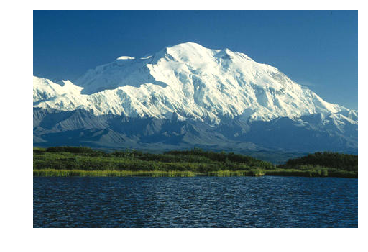

In [6]:
#Part (b) of Question 4
%matplotlib inline

# use scikit-image image processing, the io.imread returns a numpy array
import skimage.io

# Python Imaging Library is a free library for the Python programming language that 
# adds support for opening, manipulating, and saving many different image file formats.
from PIL import Image

# use matplotlib.pyplot to display the image 'inline'
import matplotlib.pyplot as plt
import urllib.error

# the follow class is to surpress the stack trace
# when the URL passed in to imread is incorrect
class StopExecution(Exception):
    def _render_traceback_(self):
        pass

# load the JPEG from URL and stored into an array
url = 'https://upload.wikimedia.org/wikipedia/commons/8/8b/Denali_Mt_McKinley.jpg'
try:
    img_array = skimage.io.imread(url)
except urllib.error.HTTPError as err:
    print("HTTP error {0}: {1}".format(err.code, err.reason))
    raise StopExecution

# print type and size of array
#type(img_array)
#img_array.shape
img = Image.fromarray(img_array)
img.show()

# alternative way to display the image as mentioned in class
# the image is displayed "inline" in jupyter notebook
plt.imshow(img_array)
plt.axis('off')

# Question 5 (5 Marks)
a. Write a Python program to draw line charts of the financial data of Alphabet Inc. between October 3, 2019 to October 7, 2019. Data source: https://finance.yahoo.com/quote/GOOG/history/.  (3 marks)

b. Read face cream and facewash product sales data (http://bit.ly/35rh8VW) and show it using the bar chart. (2 marks)

### 5(a)

In [7]:
#Part(a) of Question 5

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

# the file was downloaded from 
# https://finance.yahoo.com/quote/GOOG/history/
# and stored in local drive
# datasets: Google = 30 Sept 2019 to 01 Nov 2019
Downloaded_Google_CSV = 'GOOG_30092019_01112019.csv'

try:
    df = pd.read_csv(Downloaded_Google_CSV)
except FileNotFoundError as err:
    print('File not found!')
else:
    df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
1,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
2,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
4,2019-10-04,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


In [8]:
# format the date to 'dd-mm-YYY'
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%d-%m-%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-09-2019,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
1,01-10-2019,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
2,02-10-2019,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3,03-10-2019,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200
4,04-10-2019,1191.890015,1211.439941,1189.170044,1209.000000,1209.000000,1162400


<Figure size 432x432 with 0 Axes>

Text(0.5,0,'Date')

Text(0,0.5,'Adjusted Close Price')

Text(0.5,1,'Google')

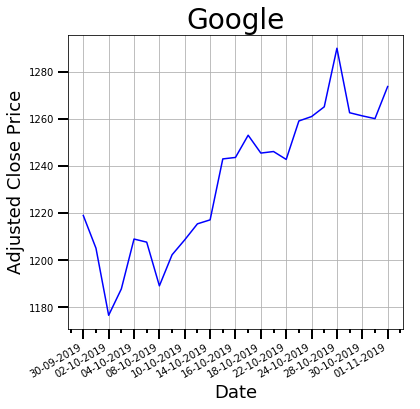

In [9]:
# plot the daily (after adjusted) close price of Google stock
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# figure size is 6 x 6 inches
plt.figure(figsize=(6,6))
plt.plot(df['Date'], df['Adj Close'], 'b-')

plt.xlabel('Date', fontsize=18)
plt.ylabel('Adjusted Close Price',  fontsize=18)
plt.title('Google', fontsize=28)

# set major and minor ticks on the x and y axes
ax = plt.gca()
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', length=4)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))

# show grid on the chart
plt.grid(True)

# the x-tick date label is slanted
plt.gcf().autofmt_xdate()

### 5(b)

In [10]:
#Part(b) of Quetion 5
import pandas as pd
import matplotlib.pyplot as plt

Downloaded_Facecream_Product_Sales_Data_CSV = 'facecream_product_sales_data.csv'

try:
    df = pd.read_csv(Downloaded_Facecream_Product_Sales_Data_CSV)
except FileNotFoundError as err:
    print('File not found!')
else:
    df.head()

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600


Text(0.5,0,'Month')

Text(0,0.5,'Units')

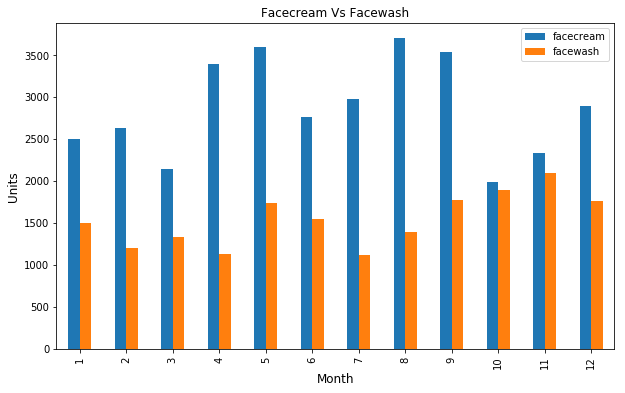

In [11]:
ax = df.plot.bar(x='month_number', y=['facecream', 'facewash'], figsize=(10, 6), title='Facecream Vs Facewash')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Units", fontsize=12)

# Question 6 (5 Marks)
Use this automotive dataset (http://bit.ly/35lErAo) to answer the following questions using the pandas module.

a. From given data set print first and last five rows. (1 mark)

b. Clean data and update the CSV file. (1 mark)

c. Count total cars per company. (1 mark)

d. Find each company’s Highest price car. (1 mark)

e. Sort all cars by Price column. (1 mark)

### 6(a) - From given data set print first and last five rows. (1 mark)

In [12]:
import numpy as np
import pandas as pd

# take the raw data from github, given original URL is http://bit.ly/35lErAo
urlDataset = 'https://raw.githubusercontent.com/kwseow/kwseow.github.io/master/datasets/Automobile_data.csv'

df = pd.read_csv(urlDataset)

df.info()
# based on the info below there are 3 'blanks' in price column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 10 columns):
index               61 non-null int64
company             61 non-null object
body-style          61 non-null object
wheel-base          61 non-null float64
length              61 non-null float64
engine-type         61 non-null object
num-of-cylinders    61 non-null object
horsepower          61 non-null int64
average-mileage     61 non-null int64
price               58 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 4.9+ KB


In [13]:
df.describe()

# Based on below the index has min value (zero) which is alright
# Conclusion: 
#    - there is no zero value in the dataset that does not make sense

,index,wheel-base,length,horsepower,average-mileage,price
count,61.000000,61.000000,61.000000,61.000000,61.000000,58.000000
mean,40.885246,98.481967,173.098361,107.852459,25.803279,15387.000000
std,25.429706,6.679234,14.021846,53.524398,8.129821,11320.259841
min,0.000000,88.400000,141.100000,48.000000,13.000000,5151.000000
25%,18.000000,94.500000,159.100000,68.000000,19.000000,6808.500000
50%,39.000000,96.300000,171.200000,100.000000,25.000000,11095.000000
75%,61.000000,101.200000,177.300000,123.000000,31.000000,18120.500000
max,88.000000,120.900000,208.100000,288.000000,47.000000,45400.000000


In [14]:
# print first 5 rows of the dataset
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [15]:
# print last 5 rows of the dataset
df.tail()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0
60,88,volvo,wagon,104.3,188.8,ohc,four,114,23,13415.0


### 6(b) - Clean data and update the CSV file. (1 mark)

In [16]:
df['company'].unique()

# below shows the company names found in the dataset and they are legit car manufacturer names

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mitsubishi',
       'nissan', 'porsche', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df['body-style'].unique()

# below shows that the body-styles in the dataset and they are alright

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [18]:
# skip the below since the information is already in the description (df.describe())
#df['wheel-base'].dtype
#df['length'].dtype

In [19]:
df['engine-type'].unique()

# dohc (Dual OverHead Cam), 
# dohcv (Dual OverHead Cam and Valve), 
# l (L engine), 
# ohc (OverHead Cam), 
# ohcf (OverHead Cam and Valve F engine), 
# ohcv (OverHead Cam and Valve) and 
# rotor (Rotary engine)

#engine types in the dataset are alright

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [20]:
df['num-of-cylinders'].unique()

# number of cylinders are in words i.e. 1->'one', 2->'two'
# action: to convert to integer so that the model can process it

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [21]:
# skip the below since the information is already in the description (df.describe())
#df['horsepower'].dtype
#df['average-mileage'].dtype
#df['price'].dtype

In [22]:
# show the rows that have NaN
x = df.isnull().values.any(axis=1)
indexes = np.where(x == True)
df.loc[indexes]

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
22,31,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
23,32,isuzu,sedan,94.5,155.9,ohc,four,70,38,NaN
47,63,porsche,hatchback,98.4,175.7,dohcv,eight,288,17,NaN


In [23]:
# clean the data

# convert cylinders (in word) to integer
cyl_conversion_dict = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(cyl_conversion_dict)

# fill the NaN
# before
print(df.isnull().sum())

index               0
company             0
body-style          0
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64


In [24]:
#after
#option 1 - easiest
#drop the rows that have NaN
df.dropna(inplace=True)

# 61 rows - 3 rows = 58 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 10 columns):
index               58 non-null int64
company             58 non-null object
body-style          58 non-null object
wheel-base          58 non-null float64
length              58 non-null float64
engine-type         58 non-null object
num-of-cylinders    58 non-null int64
horsepower          58 non-null int64
average-mileage     58 non-null int64
price               58 non-null float64
dtypes: float64(3), int64(4), object(3)
memory usage: 5.0+ KB


In [25]:
#option 2 - Impute Missing Valuesco
#fill missing values with mean column values
#df['price'].fillna(df['price'].mean(), inplace=True)

In [33]:
# save the CSV locally
import os

saved_filename = "cleaned_Automobile_data.csv"

df.to_csv(os.path.join(os.getcwd(), saved_filename))
print('File {} saved.\n'.format(os.path.join(os.getcwd(), saved_filename)))

File C:\Users\SengTian\Downloads\Temp\Republic Polytechnic\Python_Assignment\TIPPAAI_P4DS_Koay_Seng_Tian\cleaned_Automobile_data.csv saved.



### 6(c) - Count total cars per company. (1 mark)

In [27]:
df['company'].value_counts(ascending=True)

isuzu            1
dodge            2
volvo            2
porsche          2
honda            3
chevrolet        3
alfa-romero      3
jaguar           3
mitsubishi       4
audi             4
mercedes-benz    4
volkswagen       4
mazda            5
nissan           5
bmw              6
toyota           7
Name: company, dtype: int64

### 6(d) - Find each company’s Highest price car. (1 mark)

In [28]:
df.groupby('company')['company', 'price'].max()

,company,price
company,,
alfa-romero,alfa-romero,16500.0
audi,audi,18920.0
bmw,bmw,41315.0
chevrolet,chevrolet,6575.0
dodge,dodge,6377.0
honda,honda,12945.0
isuzu,isuzu,6785.0
jaguar,jaguar,36000.0
mazda,mazda,18344.0


### 6(e) - Sort all cars by Price column. (1 mark)

In [29]:
df.sort_values(['price'], ascending=False)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
35,47,mercedes-benz,hardtop,112.0,199.2,ohcv,8,184,14,45400.0
11,14,bmw,sedan,103.5,193.8,ohc,6,182,16,41315.0
34,46,mercedes-benz,sedan,120.9,208.1,ohcv,8,184,14,40960.0
46,62,porsche,convertible,89.5,168.9,ohcf,6,207,17,37028.0
12,15,bmw,sedan,110.0,197.0,ohc,6,182,15,36880.0
26,35,jaguar,sedan,102.0,191.7,ohcv,12,262,13,36000.0
25,34,jaguar,sedan,113.0,199.6,dohc,6,176,15,35550.0
45,61,porsche,hardtop,89.5,168.9,ohcf,6,207,17,34028.0
24,33,jaguar,sedan,113.0,199.6,dohc,6,176,15,32250.0
10,13,bmw,sedan,103.5,189.0,ohc,6,182,16,30760.0


# Question 7 (10 Marks)
Write a script that goes to a photo-sharing site like Flickr or Imgur, searches for a category of photos, and then downloads all the resulting images. You could write a script that works with any photo site that has a search feature.
After all images were downloaded, perform the following:

1. Convert the images to greyscale and save them into a separate directory
2. Resize the images to 28px by 28px and save them into a separate directory
3. With the 28px by 28px, create images of 5x5 photo grids
4. Randomly, apply filters (e.g. blur, rotation) on the original images and save them into a separate directory. Rename the new images with the applied filter’s name. E.g. if the original filename is img_1234.jpg, a blur filter is applied, the new filename could be img_1234_blur.jpg.